<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [93]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [94]:
# Cargar datos
path = 'C:/Users/Memo/Desktop/npl/taller7/datos.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [95]:
data.product_category.value_counts(normalize=True)


jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [96]:
train, test = train_test_split(data, test_size=0.2, random_state=33)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [97]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)


In [98]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3237)
Tamaño de X_test (prueba): (200, 3237)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [99]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')


# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

Predicciones:

In [100]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [101]:
y_pred_svm

array(['video_games', 'video_games', 'video_games', 'video_games',
       'jewelry', 'jewelry', 'jewelry', 'video_games', 'jewelry',
       'jewelry', 'video_games', 'video_games', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'jewelry', 'video_games',
       'jewelry', 'video_games', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'video_games', 'video_games', 'video_games', 'video_games',
       'video_games', 'jewelry', 'jewelry', 'jewelry', 'video_games',
       'video_games', 'video_games', 'jewelry', 'video_games',
       'video_games', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'video_games',
       'jewelry', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'jewe

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [102]:
def TMetricas(valorp_data):
    metricas = [accuracy_score, precision_score, recall_score, f1_score]
    for metrica in metricas:
        print(metrica.__name__)
        if metrica == accuracy_score:
            print(f"Naive Bayes: {metrica(y_test, y_pred_nb):.2f}")
            print(f"Regresión Logística: {metrica(y_test, y_pred_logreg):.2f}")
            print(f"SVM: {metrica(y_test, y_pred_svm):.2f}")
            print(f"Árbol de decisión: {metrica(y_test, y_pred_dt):.2f}")
            print()
        else: 
            print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label=valorp_data):.2f}")
            print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label=valorp_data):.2f}")
            print(f"SVM: {metrica(y_test, y_pred_svm, pos_label=valorp_data):.2f}")
            print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label=valorp_data):.2f}")
            print()

In [103]:
#parametro clase positiva
TMetricas('jewelry')

accuracy_score
Naive Bayes: 0.88
Regresión Logística: 0.86
SVM: 0.88
Árbol de decisión: 0.76

precision_score
Naive Bayes: 0.85
Regresión Logística: 0.85
SVM: 0.88
Árbol de decisión: 0.76

recall_score
Naive Bayes: 0.92
Regresión Logística: 0.89
SVM: 0.90
Árbol de decisión: 0.79

f1_score
Naive Bayes: 0.89
Regresión Logística: 0.87
SVM: 0.89
Árbol de decisión: 0.77



###  `[BONUS: 3 pts]` Matriz de confusión

Reporte de clasificacion

In [104]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()



Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.85      0.92      0.89       106
 video_games       0.91      0.82      0.86        94

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.85      0.89      0.87       106
 video_games       0.87      0.83      0.85        94

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200


SVM
              precision    recall  f1-score   support

     jewelry       0.88      0.90      0.89       106
 video_games       0.88      0.86      0.87        94

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88   

In [105]:
def MConfusion(m1, m2, m3, m4, xt, yt):
    %config InlineBackend.figure_format = 'svg'

    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(2,2,1)
    plot_confusion_matrix(m1, xt, yt, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
    plt.title("Naive Bayes")

    ax2 = fig.add_subplot(2,2,2)
    plot_confusion_matrix(m2, xt, yt, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
    plt.title("Regresión Logística")

    ax3 = fig.add_subplot(2,2,3)
    plot_confusion_matrix(m3, xt, yt, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
    plt.title("SVM");

    ax4 = fig.add_subplot(2,2,4)
    plot_confusion_matrix(m4, xt, yt, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
    plt.title("Árbol de decisión");


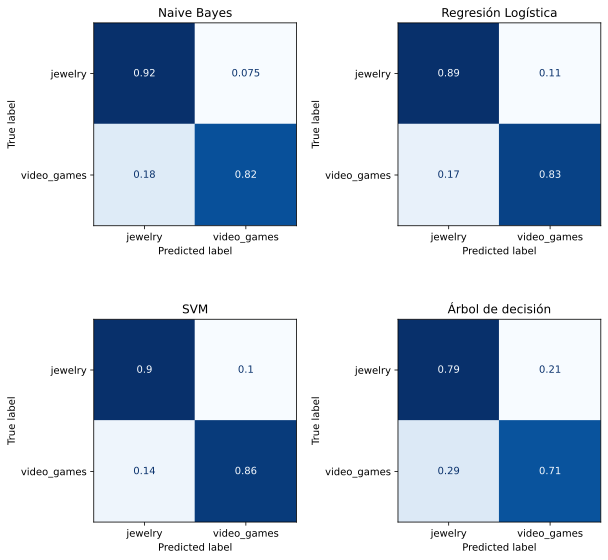

In [106]:
MConfusion(nb, logreg, svm, dt, X_test, y_test)



In [107]:
datos = ['Hola como estas','muy bien te odio']
datos_trans = tfidf_vect.transform(datos)
pd.DataFrame(datos_trans.toarray())

,0,1,2,3,4,5,6,7,8,9,...,3227,3228,3229,3230,3231,3232,3233,3234,3235,3236
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
def predecir():
    print(f"Regresion logistica: {logreg.predict(datos_trans)}, probabilidad: {logreg.predict_proba(datos_trans)}")
    print(f"Ingenuo de bayes : {nb.predict(datos_trans)}, probabilidad: {nb.predict_proba(datos_trans)}")
    print(f"Support vector machine: {svm.predict(datos_trans)}")
    print(f"Arboles: {dt.predict(datos_trans)}, probabilidad: {dt.predict_proba(datos_trans)}")

In [109]:
predecir()

Regresion logistica: ['video_games' 'video_games'], probabilidad: [[0.48204095 0.51795905]
 [0.42756745 0.57243255]]
Ingenuo de bayes : ['video_games' 'jewelry'], probabilidad: [[0.47905139 0.52094861]
 [0.51760198 0.48239802]]
Support vector machine: ['video_games' 'video_games']
Arboles: ['jewelry' 'jewelry'], probabilidad: [[1. 0.]
 [1. 0.]]


###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [110]:
#cambiar llave, valor 
diccionario = {value:key for key,value in tfidf_vect.vocabulary_.items()}
diccionario


{1469: 'gustado',
 2693: 'rigida',
 2426: 'protegen',
 1864: 'mejor',
 1371: 'funciona',
 2235: 'perfección',
 970: 'distribución',
 3216: 'xbox',
 619: 'conecta',
 2562: 'receptor',
 1572: 'inalámbrico',
 3169: 'viene',
 2021: 'ningún',
 30: 'accesorio',
 1060: 'embalaje',
 807: 'deja',
 863: 'desear',
 2580: 'recomedable',
 336: 'bonitas',
 1367: 'frágiles',
 819: 'delgado',
 2139: 'palito',
 984: 'dobla',
 1633: 'intentar',
 2329: 'poner',
 3063: 'tuerca',
 3123: 'vaya',
 791: 'decepcion',
 12: 'abrir',
 397: 'caja',
 1094: 'encontrarme',
 530: 'codigo',
 2882: 'steam',
 3138: 'venia',
 1183: 'especificado',
 1765: 'llevado',
 2878: 'sorpreson',
 108: 'ahora',
 1903: 'mierda',
 1735: 'linea',
 1673: 'juego',
 1878: 'mes',
 906: 'devolverlo',
 359: 'buena',
 403: 'calidad',
 2844: 'sobran',
 345: 'botones',
 1641: 'interiores',
 1489: 'hacen',
 2467: 'pulses',
 2503: 'querer',
 1224: 'estropea',
 2165: 'partidas',
 781: 'deberían',
 607: 'comprobar',
 2406: 'producto',
 3135: 'vender

In [113]:
#jewelry
def diezpositivas():    
    print(f"Regresion logistica: {[(diccionario[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]}")
    print(f"Ingenuo de bayes : {[(diccionario[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][:10]}")
    print(f"Support vector machine: {[(diccionario[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(svm.coef_[0]))][:10]}")
    #print(f"Arboles: {[(diccionario[e[0]], round(e[1],2)) for e in zip(dt.coef_[0].argsort(), sorted(dt.coef_[0]))][:10]}")
    
    
diezpositivas()

Regresion logistica: [('calidad', -2.19), ('bonito', -2.11), ('bonitos', -1.97), ('foto', -1.76), ('cadena', -1.6), ('pulsera', -1.58), ('plata', -1.48), ('bonita', -1.29), ('pendientes', -1.26), ('pequeño', -1.08)]
Ingenuo de bayes : [('inoxidable', -8.43), ('encontré', -8.43), ('encontrarlo', -8.43), ('recomendare', -8.43), ('encontraba', -8.43), ('encantaron', -8.43), ('encantan', -8.43), ('recuerda', -8.43), ('encantadas', -8.43), ('encantada', -8.43)]
Support vector machine: [('calidad', -1.51), ('bonitos', -1.48), ('pulsera', -1.46), ('gracias', -1.45), ('foto', -1.36), ('cadena', -1.25), ('plata', -1.18), ('bonito', -1.17), ('bonita', -1.1), ('pendientes', -1.09)]


In [114]:
#video games
[(diccionario[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]


[('calidad', -2.19),
 ('bonito', -2.11),
 ('bonitos', -1.97),
 ('foto', -1.76),
 ('cadena', -1.6),
 ('pulsera', -1.58),
 ('plata', -1.48),
 ('bonita', -1.29),
 ('pendientes', -1.26),
 ('pequeño', -1.08)]

In [115]:
# Árbol de decisión (feature importances)
#jewelry
[(diccionario[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

[('funciona', 0.02),
 ('pulsera', 0.02),
 ('foto', 0.02),
 ('perfecto', 0.02),
 ('producto', 0.03),
 ('bonitos', 0.03),
 ('calidad', 0.04),
 ('bonito', 0.04),
 ('mando', 0.05),
 ('juego', 0.13)]

In [116]:
#video game
[(diccionario[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][:10]

[('abajo', 0.0),
 ('pagaria', 0.0),
 ('pagarlo', 0.0),
 ('pagaría', 0.0),
 ('pagas', 0.0),
 ('pago', 0.0),
 ('pague', 0.0),
 ('pagué', 0.0),
 ('paja', 0.0),
 ('pal', 0.0)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
los  modelos ingenuo de bayes y regresion logistica son los mas acertados para clasificar los corpus de las categorias definidas.